In [1]:
import numpy as np
from skimage.io import imread
from skimage.transform import rescale
from skimage.transform import rotate
from skimage import exposure
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
sample_dir = '/DL_course_data/Lab1/X_ray/train/C4_4662.jpg'
img = imread(sample_dir)
row, col = img.shape
def show_paired(Original, Transform, Operation):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.ravel()
    ax[0].imshow(Original, cmap='gray')
    ax[0].set_title("Original image")
    ax[1].imshow(Transform, cmap='gray')
    ax[1].set_title(Operation + " image")
    if Operation == "Rescaled":
        ax[0].set_xlim(0, col)
        ax[0].set_ylim(row, 0)
    else:
        ax[0].axis('off')
        ax[1].axis('off')
    plt.tight_layout()
    plt.show()

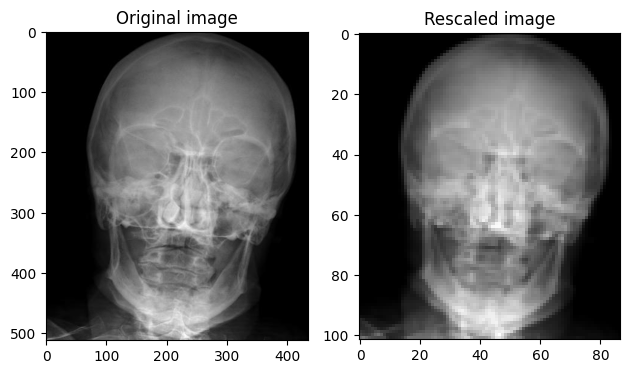

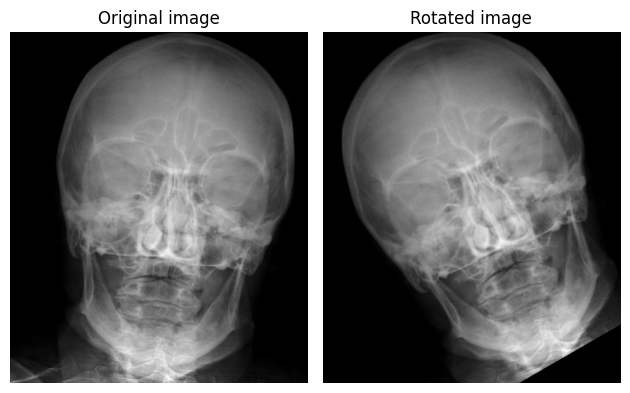

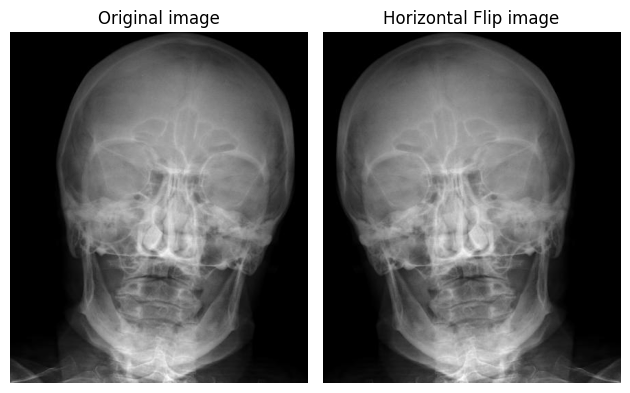

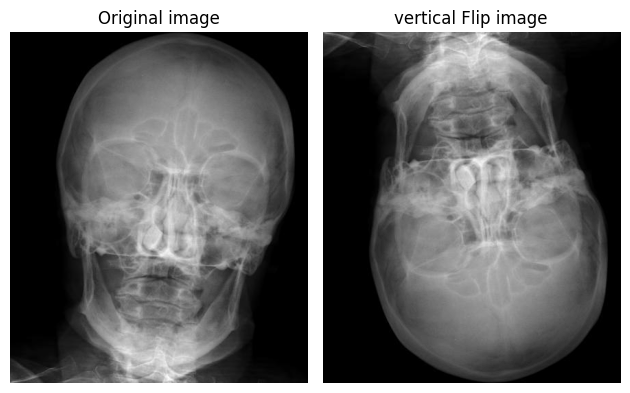

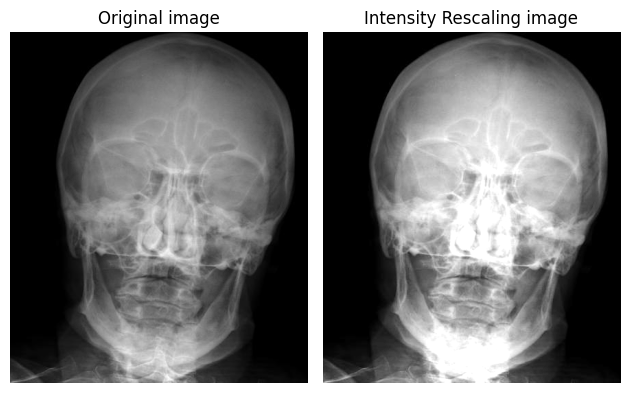

In [3]:
# Scaling
scale_factor = 0.2
image_rescaled = rescale(img, scale_factor)
show_paired(img, image_rescaled, "Rescaled")
# Rotation
angle = 30
image_rotated = rotate(img, angle)
show_paired(img, image_rotated, "Rotated")
# Horizontal Flip
horizontal_flip = img[:, ::-1]
show_paired(img, horizontal_flip, 'Horizontal Flip')
# Vertical Flip
vertical_flip = img[::-1, :]
show_paired(img, vertical_flip, 'vertical Flip')
# Intensity rescaling
low_bound, high_boud = 5, 95
min_val, max_val = np.percentile(img, (low_bound, high_boud))
better_contrast = exposure.rescale_intensity(img, in_range=(min_val, max_val))
show_paired(img, better_contrast, 'Intensity Rescaling')

# Data Generator

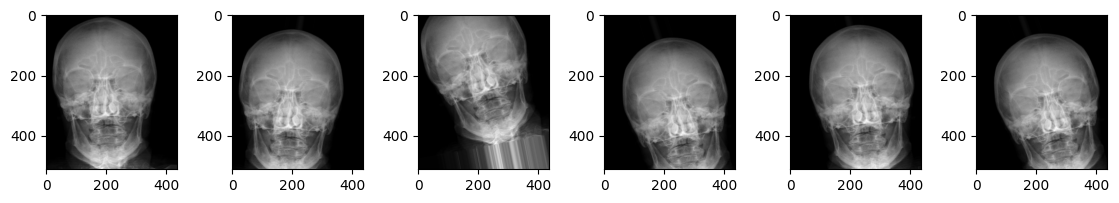

In [4]:

import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
#from tensorflow.keras.utils import array_to_img
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img
Sample = '/DL_course_data/Lab1/X_ray/train/C4_4662.jpg'
Img = imread(Sample)
Img = np.expand_dims(Img, axis = 2)
Img = np.expand_dims(Img, axis = 0)
count = 5
my_gen = ImageDataGenerator(rotation_range = 20,
width_shift_range = 0.2,
horizontal_flip = True)
fix, ax = plt.subplots(1,count+1, figsize=(14,2))
images_flow = my_gen.flow(Img, batch_size=1)
for i, new_images in enumerate(images_flow):
    new_image = array_to_img(new_images[0], scale=True)
    ax[i].imshow(new_image,cmap="gray")
    if i >= count:
        break
plt.show()

# Task 4

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [14]:
TRAIN_DIR = '/DL_course_data/Lab2/Skin/train/'
VAL_DIR = '/DL_course_data/Lab2/Skin/validation/'
img_ch, img_width, img_height = 1, 128, 128
n_epochs = 80
Batch_Size = 8
Base = 64
LR = 0.00001

In [15]:
# Create training generator
train_datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   rescale=1./255,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    target_size=(img_width, img_height),
                                                    color_mode="grayscale",
                                                    batch_size = Batch_Size,
                                                    class_mode='binary')

# Create validation generator
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(VAL_DIR, 
                                                target_size=(img_width, img_height),
                                                color_mode="grayscale",
                                                batch_size = Batch_Size,
                                                class_mode='binary',
                                                seed=42)


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [16]:
# Model Architecture
def model(img_ch, img_width, img_height):
    
    model = Sequential()
    
    model.add(Conv2D(filters=Base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.summary()   
    return model

In [21]:
model = model(img_ch, img_width, img_height)
model.compile(loss = 'binary_crossentropy',          # Model Compiling   
              optimizer = Adam(lr = LR),
              metrics = ['accuracy'])

# Run training for certain amount of epochs
History = model.fit_generator(train_generator, steps_per_epoch = 1000//Batch_Size,
    validation_data = val_generator, validation_steps = 200//Batch_Size,
    epochs = n_epochs,  verbose=1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 128)      5

# Task 5

In [22]:
TRAIN_DIR = '/DL_course_data/Lab2/Skin/train/'
VAL_DIR = '/DL_course_data/Lab2/Skin/validation/'
img_ch, img_width, img_height = 1, 128, 128
n_epochs = 80
Batch_Size = 8
Base = 64
LR = 0.00001

In [23]:
# Create training generator
train_datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   rescale=1./255,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    target_size=(img_width, img_height),
                                                    color_mode="grayscale",
                                                    batch_size = Batch_Size,
                                                    class_mode='binary')

# Create validation generator
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(VAL_DIR, 
                                                target_size=(img_width, img_height),
                                                color_mode="grayscale",
                                                batch_size = Batch_Size,
                                                class_mode='binary',
                                                seed=42)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [24]:
def model(img_ch, img_width, img_height, base_filters):
    
    model = Sequential()
    
    model.add(Conv2D(filters=base_filters, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=base_filters, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=base_filters*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=base_filters*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=base_filters*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=base_filters*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=base_filters*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=base_filters*8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=base_filters*8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=base_filters*8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=base_filters*8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=base_filters*8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=base_filters*8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

  
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))    # Model Architecture in Whole
    model.summary()

    return model

In [ ]:
model = model(img_ch, img_width, img_height,Base)
model.compile(loss = 'binary_crossentropy',          # Model Compiling   
              optimizer = Adam(lr = LR),
              metrics = ['accuracy'])

# Run training for certain amount of epochs
History = model.fit_generator(train_generator, steps_per_epoch = 1000//Batch_Size,
    validation_data = val_generator, validation_steps = 200//Batch_Size,
    epochs = n_epochs,  verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 64)      640       
                                                                 
 activation_8 (Activation)   (None, 128, 128, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 activation_9 (Activation)   (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 128)       73856     
                                                      